In [13]:
import sys

# !{sys.executable} -m pip install -r requirements.txt --quiet

import sys
sys.path.append("/Users/sreejithnoopur/codebase/bioclip-vector-db")

import PIL.Image
from IPython.display import display
from datetime import datetime
import importlib
import datasets 

import src.bioclip_vector_db.vector_db as vector_db

import importlib

importlib.reload(vector_db)


<module 'src.bioclip_vector_db.vector_db' from '/Users/sreejithnoopur/codebase/bioclip-vector-db/src/bioclip_vector_db/vector_db.py'>

In [14]:
bioclip_vdb = vector_db.BioclipVectorDatabase(vector_db.HfDatasetType.BIRD, 
                                    collection_dir="/tmp/vector_db_bird", 
                                    split="train")

[2025-03-16 20:11:56,197] [INFO] [root] MPS is available
[2025-03-16 20:11:56,313] [INFO] [root] Loaded hf-hub:imageomics/bioclip model config.
[2025-03-16 20:11:57,718] [INFO] [root] Loading pretrained hf-hub:imageomics/bioclip weights (/Users/sreejithnoopur/.cache/huggingface/hub/models--imageomics--bioclip/snapshots/a1a779ecabfa8df4d842e36dafef45a1a4c77a09/open_clip_pytorch_model.bin).
[2025-03-16 20:11:58,862] [INFO] [root] Loading dataset: Somnath01/Birds_Species for split: train


Resolving data files:   0%|          | 0/1000 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/50 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/403 [00:00<?, ?it/s]

[2025-03-16 20:11:59,830] [INFO] [root] Dataset loaded with 1000 records.


In [15]:
bioclip_vdb.load_database(reset=False)

[2025-03-16 20:11:59,837] [INFO] [root] Record with id: 0 already exists in the database. Skipping.
[2025-03-16 20:11:59,838] [INFO] [root] Record with id: 1 already exists in the database. Skipping.
[2025-03-16 20:11:59,839] [INFO] [root] Record with id: 2 already exists in the database. Skipping.
[2025-03-16 20:11:59,840] [INFO] [root] Record with id: 3 already exists in the database. Skipping.
[2025-03-16 20:11:59,840] [INFO] [root] Record with id: 4 already exists in the database. Skipping.
[2025-03-16 20:11:59,841] [INFO] [root] Record with id: 5 already exists in the database. Skipping.
[2025-03-16 20:11:59,842] [INFO] [root] Record with id: 6 already exists in the database. Skipping.
[2025-03-16 20:11:59,843] [INFO] [root] Record with id: 7 already exists in the database. Skipping.
[2025-03-16 20:11:59,844] [INFO] [root] Record with id: 8 already exists in the database. Skipping.
[2025-03-16 20:11:59,845] [INFO] [root] Record with id: 9 already exists in the database. Skipping.


In [8]:
collection = bioclip_vdb.get_vector_database()

test_dataset = datasets.load_dataset(HfDatasetType.BIRD.value, 
                                     split="test", 
                                     streaming=False)

Resolving data files:   0%|          | 0/1000 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/50 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/403 [00:00<?, ?it/s]

### Query 

In [9]:
def get_neighbors(test_idx: int):
    query_img_embedding = bioclip_vdb._classifier.create_image_features_for_image(
        test_dataset[test_idx]["image"], normalize=True).tolist()
    
    return collection.query(query_embeddings=[query_img_embedding], 
                     n_results = 5)['ids']

In [12]:
def display_neighbors(test_idx: int):
    start_ts = datetime.now()
    neighbors = get_neighbors(test_idx)[0]
    end_ts = datetime.now()
    print("Below is the candidate image")
    display(test_dataset[test_idx]["image"])

    print("\nNearest neighbors")
    for neighbor in neighbors:
        display(bioclip_vdb._dataset[int(neighbor)]["image"])

    print(f"Time taken: {end_ts - start_ts}")

Below is the candidate image


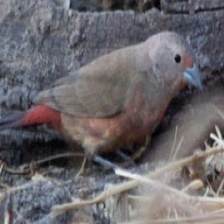


Nearest neighbors


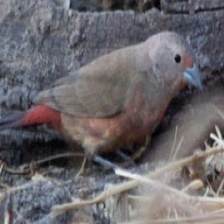

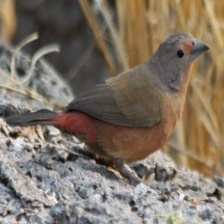

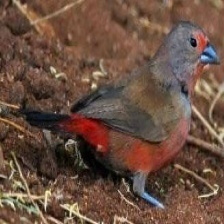

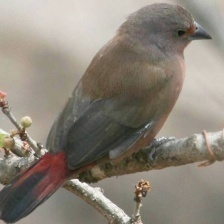

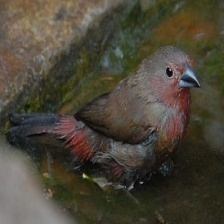

Time taken: 0:00:00.064937


In [16]:
display_neighbors(205)